In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

np.random.seed(0)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data  # type: ignore
y = housing.target  # type: ignore
X.shape, y.shape, housing.feature_names[0:6]  # type: ignore

((20640, 8),
 (20640,),
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])

In [3]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [4]:
from models_sklearn import MLP, FONN1, FONN2, TREENN1, TREENN2

mlp = MLP()
fonn1 = FONN1()
fonn2 = FONN2()
treenn1 = TREENN1()
treenn2 = TREENN2()

mlp, fonn1, fonn2, treenn1, treenn2

(MLP(), FONN1(), FONN2(), TREENN1(), TREENN2())

In [15]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV

mlp_param_grid = {
    'hidden_layer_sizes': [(10, )],
    'max_iter': [1000],
    'learning_rate': ['constant'],
    'learning_rate_init': [1e-1, 1e-2],
    'tol': [1e-4],
    'early_stopping': [True]
}

np.random.seed(0)
mlp_search = GridSearchCV(mlp, mlp_param_grid)
mlp_search.fit(X, y)
mlp_best = mlp_search.best_estimator_
mlp_search.best_score_, mlp_search.best_estimator_

(0.675763586990348,
 MLP(early_stopping=True, hidden_layer_sizes=(10,), learning_rate_init=0.01,
     max_iter=1000))

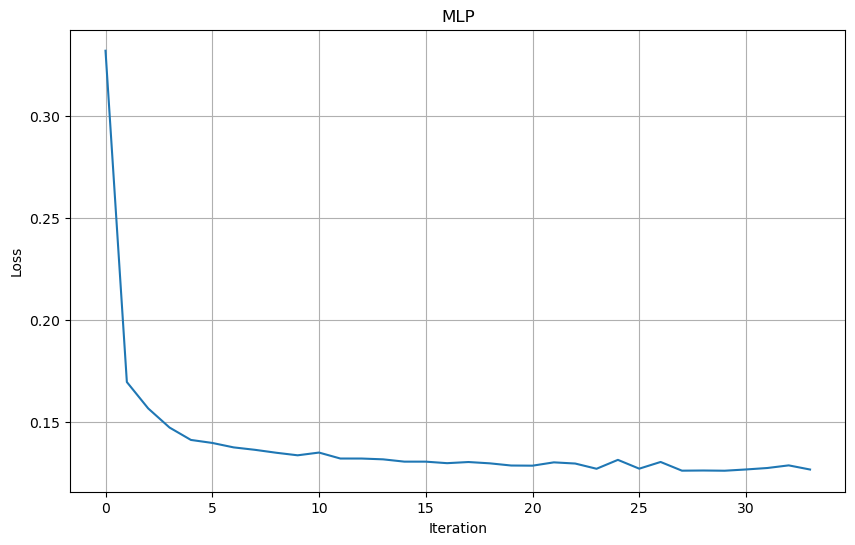

In [16]:
from models_sklearn import plot_loss

plot_loss(mlp_best, 'MLP')

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Convert cv_results_ to a DataFrame
# results = pd.DataFrame(mlp_search.cv_results_)

# # Pivot the DataFrame to create a matrix for the heatmap
# heatmap_data = results.sort_values("iter").pivot_table(
#     index="param_max_iter",
#     columns="param_hidden_layer_sizes",
#     values="mean_test_score",
#     aggfunc="last",
# )

# # Plot the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(heatmap_data, annot=True, cmap='viridis')
# plt.title('HalvingGridSearchCV Results')
# plt.xlabel('Number of Estimators')
# plt.ylabel('Learning Rate')
# plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from models_sklearn import plot_loss, evaluate_model

mlp_constant = MLP((10,), max_iter=1000, learning_rate='constant',
                   learning_rate_init=1e-1, tol=1e-4, early_stopping=True)
mlp_constant_results = evaluate_model(mlp_constant, X, y, n=10)

mlp_constant_results.min(), mlp_constant_results.max(), mlp_constant_results.mean(), mlp_constant_results.std()

(r2             0.715623
 mae            0.361332
 mse            0.262269
 train_time     0.144664
 comp_time      0.000164
 n_iter        19.000000
 dtype: float64,
 r2             0.737188
 mae            0.375625
 mse            0.285855
 train_time     0.435184
 comp_time      0.000264
 n_iter        46.000000
 dtype: float64,
 r2             0.725393
 mae            0.367997
 mse            0.274148
 train_time     0.282860
 comp_time      0.000203
 n_iter        31.100000
 dtype: float64,
 r2            0.007401
 mae           0.005289
 mse           0.007360
 train_time    0.084087
 comp_time     0.000030
 n_iter        8.478076
 dtype: float64)

In [22]:
mlp_invscaling = MLP((10,), max_iter=1000, learning_rate='invscaling',
                     learning_rate_init=1e-1, tol=1e-4, early_stopping=True)
mlp_invscaling_results = evaluate_model(mlp_invscaling, X, y, n=10)

mlp_invscaling_results.min(), mlp_invscaling_results.max(), mlp_invscaling_results.mean(), mlp_invscaling_results.std()

(r2             0.714983
 mae            0.343453
 mse            0.236279
 train_time     0.182766
 comp_time      0.000177
 n_iter        19.000000
 dtype: float64,
 r2             0.762124
 mae            0.372397
 mse            0.284362
 train_time     0.488156
 comp_time      0.000333
 n_iter        50.000000
 dtype: float64,
 r2             0.733004
 mae            0.361989
 mse            0.266478
 train_time     0.295222
 comp_time      0.000237
 n_iter        32.100000
 dtype: float64,
 r2             0.015411
 mae            0.008923
 mse            0.013953
 train_time     0.106475
 comp_time      0.000059
 n_iter        11.474125
 dtype: float64)

In [24]:
mlp_adaptive = MLP((10,), max_iter=1000, learning_rate='adaptive',
                   learning_rate_init=1e-1, tol=1e-4, early_stopping=True)

mlp_adaptive_results = evaluate_model(mlp_adaptive, X, y, n=10)
mlp_adaptive_results.min(), mlp_adaptive_results.max(), mlp_adaptive_results.mean(), mlp_adaptive_results.std()

(r2             0.649013
 mae            0.354450
 mse            0.249928
 train_time     0.150404
 comp_time      0.000167
 n_iter        17.000000
 dtype: float64,
 r2             0.748383
 mae            0.382939
 mse            0.342888
 train_time     0.513471
 comp_time      0.000234
 n_iter        54.000000
 dtype: float64,
 r2             0.719281
 mae            0.370426
 mse            0.280066
 train_time     0.322101
 comp_time      0.000199
 n_iter        34.400000
 dtype: float64,
 r2             0.029722
 mae            0.010096
 mse            0.027279
 train_time     0.119814
 comp_time      0.000020
 n_iter        11.955473
 dtype: float64)

In [25]:
mlp_adaptive = MLP((10,), max_iter=1000, learning_rate='constant',
                   learning_rate_init=1e-2, tol=1e-4, early_stopping=True)

mlp_adaptive_results = evaluate_model(mlp_adaptive, X, y, n=10)
mlp_adaptive_results.min(), mlp_adaptive_results.max(), mlp_adaptive_results.mean(), mlp_adaptive_results.std()

(r2             0.713302
 mae            0.336305
 mse            0.227401
 train_time     0.431327
 comp_time      0.000186
 n_iter        42.000000
 dtype: float64,
 r2              0.771062
 mae             0.362420
 mse             0.289597
 train_time      1.462468
 comp_time       0.000339
 n_iter        153.000000
 dtype: float64,
 r2             0.742375
 mae            0.352036
 mse            0.257185
 train_time     0.744238
 comp_time      0.000224
 n_iter        77.000000
 dtype: float64,
 r2             0.016883
 mae            0.009076
 mse            0.016779
 train_time     0.300696
 comp_time      0.000044
 n_iter        31.927000
 dtype: float64)

In [26]:
mlp_adaptive = MLP((10,), max_iter=1000, learning_rate='adaptive',
                   learning_rate_init=1e-2, tol=1e-4, early_stopping=True)

mlp_adaptive_results = evaluate_model(mlp_adaptive, X, y, n=10)
mlp_adaptive_results.min(), mlp_adaptive_results.max(), mlp_adaptive_results.mean(), mlp_adaptive_results.std()

(r2             0.717591
 mae            0.336583
 mse            0.236927
 train_time     0.290317
 comp_time      0.000176
 n_iter        31.000000
 dtype: float64,
 r2             0.761471
 mae            0.363602
 mse            0.284897
 train_time     0.663641
 comp_time      0.001136
 n_iter        65.000000
 dtype: float64,
 r2             0.738861
 mae            0.354264
 mse            0.260765
 train_time     0.536835
 comp_time      0.000309
 n_iter        51.300000
 dtype: float64,
 r2             0.012819
 mae            0.007907
 mse            0.014171
 train_time     0.104051
 comp_time      0.000292
 n_iter        10.274564
 dtype: float64)